In [44]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

In [52]:
def gamma_transfer_func(S11_here, S12_here, S21_here, S22_here, Gamma_here):
    Gamma_prime_here = S11_here + ( S12_here * S21_here * Gamma_here/(1 - S22_here*Gamma_here))
    return Gamma_prime_here

def de_embed(S11_here, Diff_here, S22_here, Gamma_prime_here):
    Gamma_here = (Gamma_prime_here - S11_here)/(Diff_here + S22_here*Gamma_prime_here)
    return Gamma_here

In [53]:
freq = np.loadtxt("Open.txt", usecols=0)
Gamma_open = np.loadtxt("Open.txt", usecols=1)+np.loadtxt("Open.txt", usecols=2)*1j
Gamma_short = np.loadtxt("Short.txt", usecols=1)+np.loadtxt("Short.txt", usecols=2)*1j
Gamma_load = np.loadtxt("Load.txt", usecols=1)+np.loadtxt("Load.txt", usecols=2)*1j
Gamma_RLC = np.loadtxt("long_cable.txt", usecols=1)+np.loadtxt("long_cable.txt", usecols=2)*1j

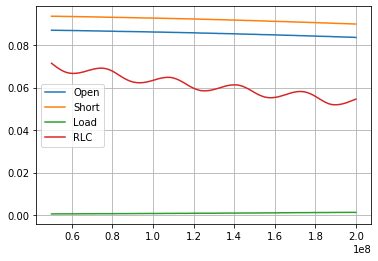

In [54]:
plt.figure()
plt.plot(freq, np.abs(Gamma_open), label="Open")
plt.plot(freq, np.abs(Gamma_short), label="Short")
plt.plot(freq, np.abs(Gamma_load), label="Load")
plt.plot(freq, np.abs(Gamma_RLC), label="RLC")
plt.legend()
plt.grid()

In [55]:
S11_RP = Gamma_open*1.0
Diff_RP = Gamma_open*1.0
S22_RP = Gamma_open*1.0
Gamma_RLC_cal = Gamma_RLC*1.0 # to get array size correct

In [56]:
EDF_array = np.array([])
ESF_array = np.array([])
diff_array = np.array([])
for i in range(len(freq)):

    # Let us assume the models as follows
    Gamma_open_model = 1.0
    Gamma_short_model = -1.0
    Gamma_load_model = 0.00

    # We will try to recover the S params of the RP now.
    Measure_matrix = np.array([[1, Gamma_open_model, Gamma_open_model*Gamma_open[i]],
                                [1, Gamma_short_model, Gamma_short_model*Gamma_short[i]],
                                [1, Gamma_load_model, Gamma_load_model*Gamma_load[i]]])

    Gamma_matrix_measu = np.array([Gamma_open[i], Gamma_short[i], Gamma_load[i]])

    reco_para = np.matmul(np.linalg.inv(Measure_matrix), Gamma_matrix_measu)

    S11_RP[i] = reco_para[0]
    Diff_RP[i] = reco_para[1]
    S22_RP[i] = reco_para[2]
    
    EDF_array = np.append(EDF_array, S11_RP[i])
    ESF_array = np.append(ESF_array, S22_RP[i])
    diff_array = np.append(ESF_array, Diff_RP[i])

    # Let us de-embed (calibrate) measured RLC values.
    Gamma_RLC_cal[i] = de_embed(S11_RP[i], Diff_RP[i], S22_RP[i], Gamma_RLC[i])

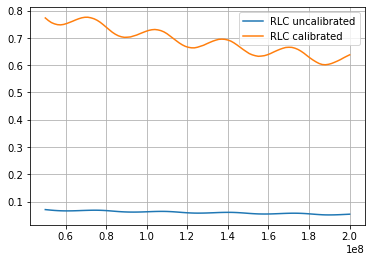

In [57]:
plt.figure()
plt.plot(freq, np.abs(Gamma_RLC), label="RLC uncalibrated")
plt.plot(freq, np.abs(Gamma_RLC_cal), label="RLC calibrated")
plt.legend()
plt.grid()
plt.show()

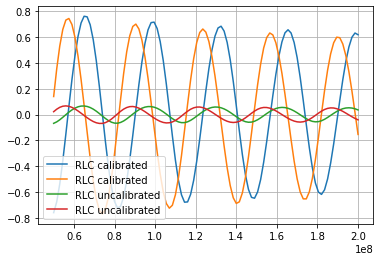

In [58]:
plt.plot(freq, np.real(Gamma_RLC_cal), label="RLC calibrated")
plt.plot(freq, np.imag(Gamma_RLC_cal), label="RLC calibrated")
plt.plot(freq, np.real(Gamma_RLC), label="RLC uncalibrated")
plt.plot(freq, np.imag(Gamma_RLC), label="RLC uncalibrated")
plt.legend()
plt.grid()

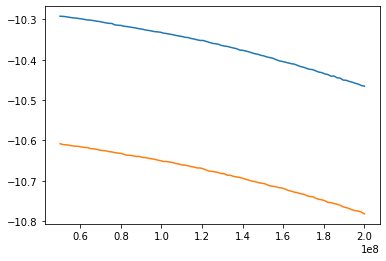

In [71]:
# plt.plot(freq, 10*np.log10(np.abs(EDF_array))-10*np.log10(np.abs(Gamma_load)))
plt.plot(freq, 10*np.log10(np.abs(Gamma_short)))
plt.plot(freq, 10*np.log10(np.abs(Gamma_open)))

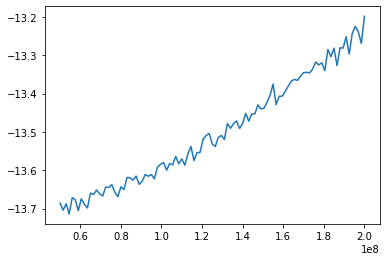

In [72]:
plt.plot(freq, 10*np.log10(np.abs(ESF_array)))